<a href="https://colab.research.google.com/github/Purva0210/GrowAI/blob/main/GrowAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (270262, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270262 entries, 0 to 270261
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         270262 non-null  object 
 1   County                                             270252 non-null  object 
 2   City                                               270252 non-null  object 
 3   State                                              270262 non-null  object 
 4   Postal Code                                        270252 non-null  float64
 5   Model Year                                         270262 non-null  int64  
 6   Make                                               270262 non-null  object 
 7   Model                                              270262 non-null  object 
 8   Electric Vehicle Type                         

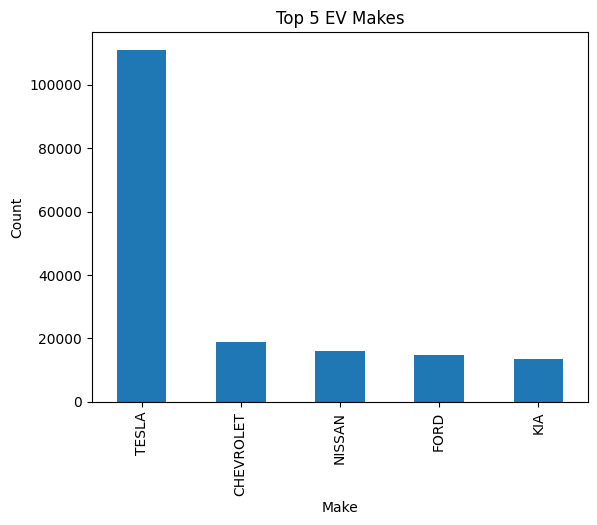

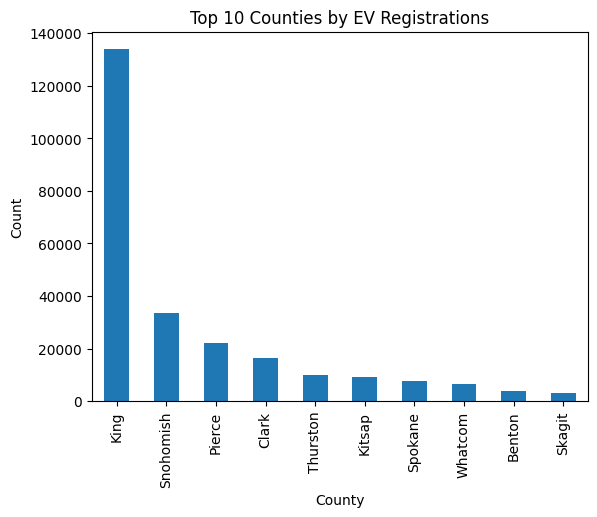

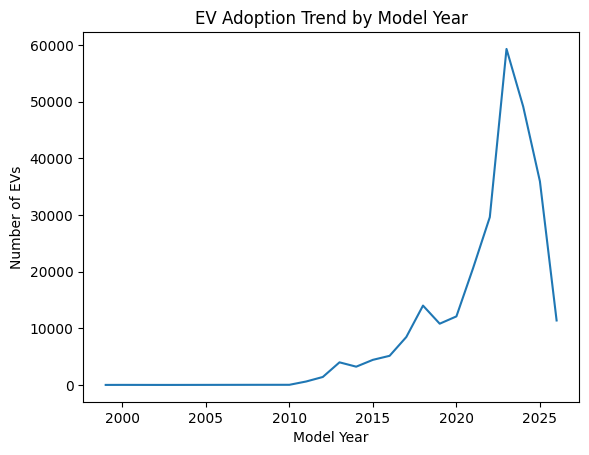

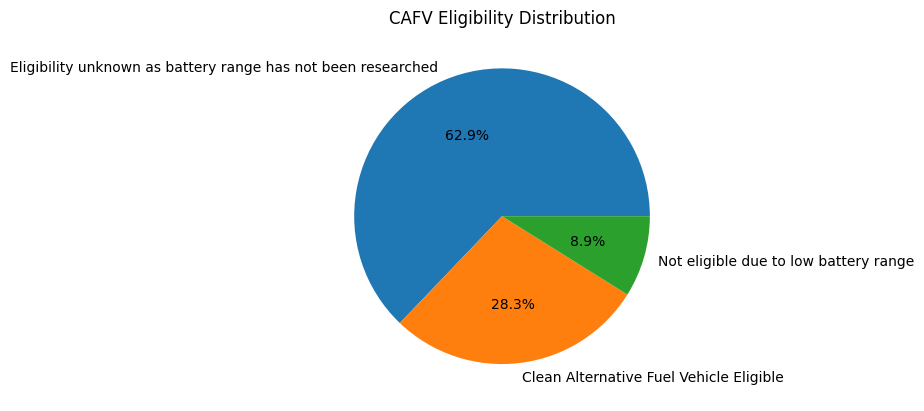

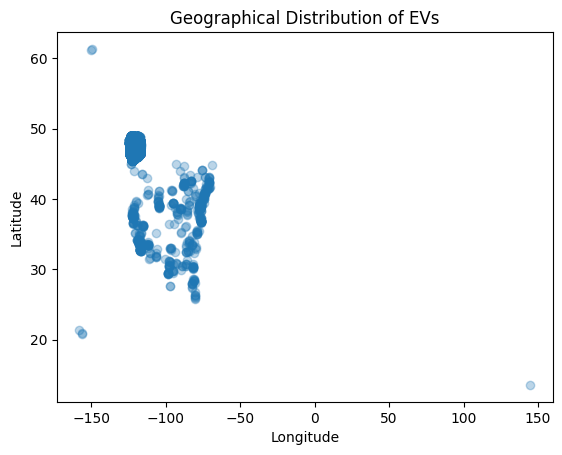

R² Score: 0.1742526749758414

Regression Coefficients:
       Feature  Coefficient
0  Model Year    -8.978319

Conclusion:
1. EV adoption has increased significantly in recent years.
2. Tesla is the most common EV manufacturer.
3. King County has the highest EV registrations.
4. (Original conclusion 'Vehicles with higher MSRP generally have higher electric range.' removed as 'Base MSRP' is not available.)
5. Linear Regression provides a reasonable prediction of electric range.



In [8]:
# STEP 1: Import Libraries & Load Data (USING FILE PATH)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")

print("Dataset Shape:", df.shape)
df.head()

# STEP 2: Dataset Information
df.info()

# SECTION 1: DATA CLEANING
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Removed lines referencing 'Base MSRP' as it does not exist in the dataset.
# df['Base MSRP'] = df['Base MSRP'].replace(0, np.nan)
df['Electric Range'] = df['Electric Range'].replace(0, np.nan)

# Removed lines referencing 'Base MSRP' as it does not exist in the dataset.
# df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
# Fix Future Warning: Reassign the result instead of using inplace=True
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())

print("Duplicate Records:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

df['VIN_Anonymized'] = df['VIN (1-10)'].astype('category').cat.codes

# Fix ValueError: Columns must be same length as key and KeyError: 1
# Clean the 'Vehicle Location' column by removing 'POINT' and parentheses and extracting numbers
# The format is 'POINT (-XXX.XXXX YYY.YYYY)'
coords_extracted = df['Vehicle Location'].str.extract(r'POINT\s+\((-?\d+\.\d+)\s+(-?\d+\.\d+)\)')

df['Longitude'] = pd.to_numeric(coords_extracted[0], errors='coerce')
df['Latitude'] = pd.to_numeric(coords_extracted[1], errors='coerce')

print("Data Cleaning Completed")

# SECTION 2: DATA EXPLORATION
top_makes = df['Make'].value_counts().head(5)
print("Top 5 EV Makes:\n", top_makes)

top_models = df['Model'].value_counts().head(5)
print("\nTop 5 EV Models:\n", top_models)

county_dist = df['County'].value_counts().head(10)
print("\nTop Counties:\n", county_dist)

year_trend = df['Model Year'].value_counts().sort_index()
print("\nEV Adoption by Model Year:\n", year_trend)

avg_range = df['Electric Range'].mean()
print("\nAverage Electric Range:", avg_range)

cafv_percent = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] \
.value_counts(normalize=True) * 100
print("\nCAFV Eligibility (%):\n", cafv_percent)

avg_range_make = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)
print("\nAverage Range by Make:\n", avg_range_make)

# Removed lines referencing 'Base MSRP' as it does not exist in the dataset.
# avg_price_model = df.groupby('Model')['Base MSRP'].mean().sort_values(ascending=False).head(10)
# print("\nAverage MSRP by Model:\n", avg_price_model)

# SECTION 3: DATA VISUALIZATION
top_makes.plot(kind='bar')
plt.title("Top 5 EV Makes")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()

county_dist.plot(kind='bar')
plt.title("Top 10 Counties by EV Registrations")
plt.xlabel("County")
plt.ylabel("Count")
plt.show()

year_trend.plot(kind='line')
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.show()

# Removed lines referencing 'Base MSRP' as it does not exist in the dataset.
# plt.scatter(df['Base MSRP'], df['Electric Range'], alpha=0.4)
# plt.title("Electric Range vs Base MSRP")
# plt.xlabel("Base MSRP")
# plt.ylabel("Electric Range")
# plt.show()

df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] \
.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("CAFV Eligibility Distribution")
plt.ylabel("")
plt.show()

plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3)
plt.title("Geographical Distribution of EVs")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# SECTION 4: LINEAR REGRESSION MODEL
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Modified X to exclude 'Base MSRP' as it does not exist in the dataset.
X = df[['Model Year']]
y = df['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nRegression Coefficients:\n", coefficients)

# FINAL CONCLUSION
print("""
Conclusion:
1. EV adoption has increased significantly in recent years.
2. Tesla is the most common EV manufacturer.
3. King County has the highest EV registrations.
4. (Original conclusion 'Vehicles with higher MSRP generally have higher electric range.' removed as 'Base MSRP' is not available.)
5. Linear Regression provides a reasonable prediction of electric range.
""")

In [ ]:
print(df[['Longitude', 'Latitude']].info())

In [5]:
print(df['Vehicle Location'].dropna().head(10).tolist())

['POINT (-122.89165 47.03954)', 'POINT (-122.18384 47.8031)', 'POINT (-122.17743 47.41185)', 'POINT (-122.03439 47.5301)', 'POINT (-122.35436 47.67596)', 'POINT (-122.22038 47.8572)', 'POINT (-122.23035 47.3074)', 'POINT (-122.69275 47.65171)', 'POINT (-122.63847 47.54103)', 'POINT (-122.36178 47.49408)']


In [7]:
print("Longitude values:\n", df['Longitude'].head())
print("\nLatitude values:\n", df['Latitude'].head())

Longitude values:
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Longitude, dtype: float64

Latitude values:
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Latitude, dtype: float64
